In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [13]:
dataset = load_iris()
X=dataset.data
y=dataset.target[:,np.newaxis]
print("The dataset has ", X.shape, " data points")
np.size(X,1)

The dataset has  (150, 4)  data points


4

[1. 1. 1. 1.]


Text(0.5,1,'Sigmoid function')

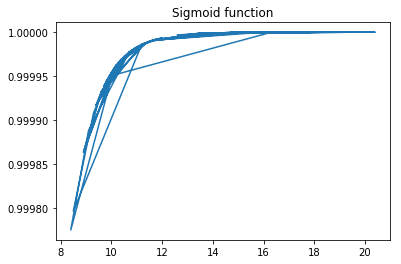

In [21]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))
def loss(h,y):
    return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
theta = np.ones(np.size(X,1))
z= np.dot(X, theta)
h = sigmoid(z)
print(theta)
#print(z)
#print(h)
plt.plot(z,h)
plt.title("Sigmoid function")

In [99]:
class MyLogisticRegression:
    def __init__ (self, lr=0.01, num_iter = 100000, fit_intercept =True, verbose = False):
        self.lr  = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self,X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X),axis=1)
    
    def __sigmoid(self,z):
        return 1 / (1+ np.exp(-z))
    
    def __loss(self, h,y):
        return (-y* np.log(h) - (1-y)* np.log(1-h)).mean()
    
    def fit(self,X,y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # weights initialization
        self.theta = np.zeros((X.shape[1],1))
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            #print(np.size(gradient))
            #print(np.size(self.theta))
            self.theta -= self.lr * gradient 
            if (self.verbose==True and i % 10000 == 0):
                z=np.dot(X,self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h,y)} \t')
    
    def predict_prob(self,X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self,X, threshold):
        return np.where(self.predict_prob(X) >= threshold,1,0)

In [112]:
#model 
model = MyLogisticRegression(lr=0.1, num_iter= 30000)
%time model.fit(X,y)
preds = model.predict(X,0.5)
preds_new = model.predict_prob(X)
preds_pd = pd.DataFrame(preds_new)
print(preds_new)
print(preds_pd.describe())
print(model.theta)
# accuracy
(preds == y).mean()

Wall time: 1.21 s
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
           0
count  150.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%

0.3333333333333333

In [107]:
h = sigmoid(z)
gradient = np.dot(X.T, (h-y)) / y.size
theta = np.zeros(X.shape[1])
lr = 0.01
print(np.size(gradient))
print(gradient.size)
test= lr * gradient
print(test.size)
print (lr * gradient.size)


600
600
600
6.0
